# CSCC11 - Introduction to Machine Learning, Fall 2022, Assignment 1

In [39]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import statistics
from scipy import stats

In [40]:
#TO-DO
"""
Read the csv file into a DataFrame - df
"""
df = pd.read_csv('Admission_Predict.csv')

In [41]:
"""
Print the DataFrame
"""
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [42]:
#TO-DO
"""
Print the length of the DataFrame.
Print the column names of the DataFrame.
"""
print("Length of df:", df.shape[0])
print("Column names:", list(df.columns))

Length of df: 400
Column names: ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


In [43]:
#TO-DO
"""
Define an “X” array that would hold our independent features for regression purposes.  
Define a "Y" array that would hold our target variable.

Print the shape of both the arrays.
"""
num_cols = df.shape[1]
X_data = np.array(df.iloc[:,1:num_cols - 1])
y_data = np.expand_dims(np.array(df.iloc[:,-1]), 1)

print("X array shape", X_data.shape)
print("y array shape", y_data.shape)

X array shape (400, 7)
y array shape (400, 1)


## Split the data 

In [44]:
#TO-DO
"""
Split the dataset into train dataset and test dataset.
Set the random state to any number in order to maintain consistency while generating random numbers over several runs.
"""
(X_train, X_test, Y_train, Y_test) = train_test_split(X_data, y_data, test_size=0.30, train_size=0.70, random_state=42)

# Linear Regression

In [45]:
#TO-DO
def find_optimal_parameters(x, y):
    """ Compute closed form solution for linear regression!
    Optimal weight w* in linear regression is given by w* = (X^T X)^(-1) X^T Y
    
    Args:
    - x (ndarray (Shape: (N, D))): A NxD matrix corresponding to the inputs.
    - y (ndarray (Shape: (N, 1))): A N-column vector corresponding to the outputs given the inputs.
    
    Output:
    - w (ndarray (Shape: (D, 1))): A D-column vector corresponding to the bias and weights of the linear model.
    """
    # Pad 1's for the bias term, Why?
    x = np.hstack((np.ones((x.shape[0], 1)), x))
    # Note that we could use pseudoinverse here instead: np.linalg.pinv
    # @ is alias for matmul
    p1 = np.linalg.inv(x.T @ x) # (X^T X) inverse
    p2 = x.T @ y # X^T Y
    w = p1 @ p2
    return w

### Train linear regression model using training data

In [46]:
#TO-DO
def get_pred_Y(trained_w, X_pred):
    """ Return predicted Y
    Args:
    - trained_w (ndarray (Shape: (D+1, 1))): A (D+1)x1 column vector containing linear regression weights.
    - X_pred (ndarray (Shape: (N, D))): A NxD matrix corresponding to the prediction inputs.
    
    Output:
    - pred_Y (ndarray (Shape: (N, 1))): A Nx1 column vector corresponding to the predicted outputs.
    """
    pad_X = np.hstack((np.ones((X_pred.shape[0], 1)), X_pred))
    pred_Y = pad_X @ trained_w
    return pred_Y

In [47]:
#TO-DO
def get_mae(Y_truth, Y_pred):
    """ Return Mean absolute error
    Args:
    - Y_truth (ndarray (Shape: (N, 1))): A Nx1 column vector corresponding to the actual outputs.
    - Y_pred (ndarray (Shape: (N, 1))): A Nx1 column vector corresponding to the predicted outputs.
    
    Output:
    - MSE (ndarray (Shape: (1,))).
    """
    'check if both inputs are of the same shape'
    N = Y_truth.shape[0]
    Y_mean = np.sum(np.absolute(Y_truth - Y_pred)) / N
    mae = np.array([Y_mean])
    return mae

def get_mse(Y_truth, Y_pred):
    """ Return Mean squared error
    Args:
    - Y_truth (ndarray (Shape: (N, 1))): A Nx1 column vector corresponding to the actual outputs.
    - Y_pred (ndarray (Shape: (N, 1))): A Nx1 column vector corresponding to the predicted outputs.
    
    Output:
    - MSE (ndarray (Shape: (1,))).
    """
    'check if both inputs are of the same shape'
    N = Y_truth.shape[0]
    Y_mean = np.sum(np.square(Y_truth - Y_pred)) / N
    mse = np.array([Y_mean])
    return mse

### Get predictions on train data

In [48]:
w_optimal = find_optimal_parameters(X_train, Y_train)
print(w_optimal)

[[-1.28417806e+00]
 [ 1.83981105e-03]
 [ 3.17072240e-03]
 [ 4.86625520e-03]
 [ 9.94694262e-04]
 [ 1.36946012e-02]
 [ 1.17818232e-01]
 [ 1.84391289e-02]]


In [49]:
pred_Y = get_pred_Y(w_optimal, X_train)
print('train error (MSE): ', get_mse(Y_train, pred_Y))
print('train error (MAE): ', get_mae(Y_train, pred_Y))

train error (MSE):  [0.00378313]
train error (MAE):  [0.04267559]


### Get predictions and performance on test data

In [50]:
pred_Y = get_pred_Y(w_optimal, X_test)
print('test error (MSE):: ', get_mse(Y_test, pred_Y))
print('test error (MAE): ', get_mae(Y_test, pred_Y))

test error (MSE)::  [0.00465282]
test error (MAE):  [0.04947839]


# Silouette Coefficient

2 :  0.5302136262600714
3 :  0.463002450306198
4 :  0.46045385187600524
5 :  0.39044393451703324
6 :  0.35352673329279066
7 :  0.3387954992768161
8 :  0.3222733496751637
9 :  0.3162926410851437
10 :  0.3044802057765099


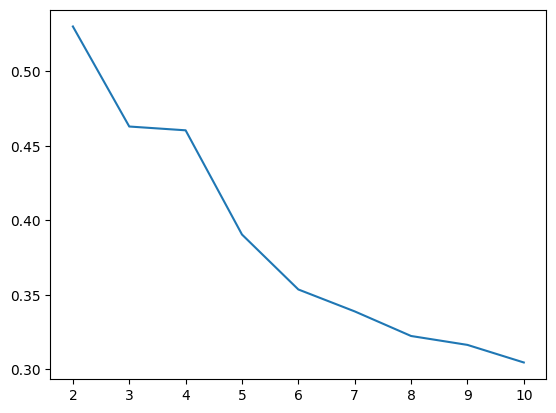

In [51]:
#TO-DO
n_silhouette = []

kmeans_kwargs= {
    "init":"k-means++",
    "n_init":30,
    "max_iter":250,
    "random_state":2
}

"""
Perform the following steps:

1. Loop over the various possible K values you wish to test
2. Initialize a K means object.
3. Fit the training data on the K means object.
4. Use the silhouette score method available from the sklearn metrics.
5. Append the score to the silhouetter_coefficients list.
6. Display the the silhouette coefficient associated with each value of K.
"""

for k in range(2, 11):
    method = KMeans(**kmeans_kwargs, n_clusters=k)
    method.fit(X_train)
    labels = method.predict(X_train)
    n_silhouette.append(silhouette_score(X_train, labels))

for k, score in enumerate(n_silhouette):
    print(k+2, ": ", score)

plt.plot(range(2,11), n_silhouette)

    

# K Means

In [52]:
kmeans = KMeans(
    init="k-means++",
    n_clusters = 2, #Input the value you configured using the Silhouette coefficient analysis.
    n_init=30,
    max_iter=250,
    random_state=2
)

#TO-DO
# Fit to the training data
kmeans.fit(X_train)

#TO-DO
# Predict clusters for the training data
train_cluster = kmeans.predict(X_train)

#TO-DO
# Add the features and the training data you used to the variable below.
XY_train = np.concatenate((X_train, Y_train), axis=1)
training_df_clustered = pd.DataFrame(data=XY_train, columns=list(df.columns)[1:])

#TO-DO
# Add the target and predicted clusters to the training DataFrame
training_df_clustered['cluster'] = train_cluster

#TO-DO
# Set the number of clusters based on the silhouette coefficient analysis
number_cluster = 2

X_train_clusters_df = []
Y_train_clusters_df = []
for i in range(number_cluster):
    X_train_clusters_df.append(training_df_clustered[training_df_clustered['cluster']==i].iloc[:,:-2])
    Y_train_clusters_df.append(training_df_clustered[training_df_clustered['cluster']==i].iloc[:,-2])

# Building Linear Regression for our clusters

In [53]:
from sklearn.linear_model import LinearRegression

"""
The number of clusters would be defined by the outcome of the silhouetter coefficient 
Set up the model of Linear Regression by exploring the different parameters: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
train_clusters_df is a dataframe that contains both the true cluster values and the predicted cluster values. Feel free to change the variable name to something else if you have been following a different naming convention.
"""

#TO-DO
# Set the number of clusters based on the silhouette coefficient analysis
number_cluster = 2
obj_cluster = []

for i in range(number_cluster):
    #TO-DO
    # Initialize a Linear Regression object.
    reg = LinearRegression()
    
    #Get the specific X_train values according to their predicted clusters.
    X_clustered_data = X_train_clusters_df[i].values
    #Get the specific Y_train values according to their predicted clusters.
    Y_clustered_data = Y_train_clusters_df[i].values

    obj_cluster.append(reg.fit(X_clustered_data, Y_clustered_data)) #Replace the underlines with the variable name you used to create the Linear Regression object.

In [54]:
def predict_value(x_test, kmeans, cluster_linear):
  """
  Input: 
  x_test is the test value that you wish to predict on.
  kmeans is the kmeans object that you have finalized to predict on the test dataset.
  cluster_linear is the list of fitted models on different clusters.

  Return:
  linear_pred - linear_pred will be type list with prediction values
  clusters - clusters_pred will be the prediction of clusters using k means.

  Follow these steps:
  1. Predict clusters using K means object on the test data.
  2. Predict regression values using Linear Regression list.
  3. return both the predictions.

  """
  linear_pred = []
  clusters = []

  clusters = kmeans.predict(x_test)
  # This is now associated cluster[i] = x_test[i]
  
  for i, row in enumerate(x_test):
    linear_pred.append(cluster_linear[clusters[i]].predict([row]))

  return linear_pred, clusters

# Final Steps

In [55]:
#Apply the clustering-based linear regression to the test set.
Y_svr_k_means_pred = predict_value(X_test, kmeans, obj_cluster)



In [56]:
print('test error (MSE):: ', get_mse(Y_test, np.array(Y_svr_k_means_pred[0])))
print('test error (MAE): ', get_mae(Y_test, np.array(Y_svr_k_means_pred[0])))

test error (MSE)::  [0.00428288]
test error (MAE):  [0.04789649]


# Discussion

The optimal training data result is:

```
train error (MSE):  [0.00378313]
train error (MAE):  [0.04267559]
```

Our training data resulted in:

```
test error (MSE)::  [0.00428288]
test error (MAE):  [0.04789649]
```

Our Silouette score resulted in:
```
2 :  0.5302136262600714
3 :  0.463002450306198
4 :  0.46045385187600524
5 :  0.39044393451703324
... (decreasing)
```

We may have encountered a slightly higher MSE and MAE because the test data is linear in nature, this can be backed up by how the silouette score is maximized at 2, which likely points to no clustering at all. Any cluster we forced onto the data only contributed to overfitting. 